    Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

    Load the data

In [2]:
df = pd.read_csv('./resources/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.set_index('CUST_ID', inplace=True)

    All the data types are appropriate

    Addressing null values of features

In [5]:
null_cols = df.columns[df.isnull().any()].to_list()

    We are not able to find a formula from the relation ship to other features for filling of missing values for both features; We can choose to drop or interpolate ; hence we will look at the distribution to decide the interpolation type

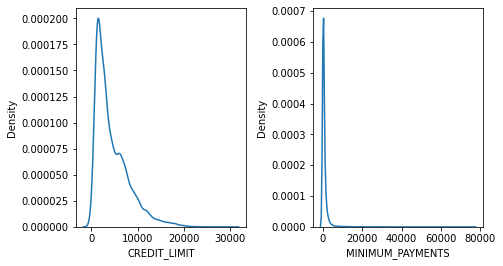

In [6]:
fig = plt.figure(figsize=(7,7))
for i, col in enumerate(null_cols):
    axis = plt.subplot(len(null_cols), 2, i+1)
    sns.kdeplot(df[col], ax=axis)
plt.tight_layout()

    Both the distributions are skewed hence interpolation should be done using median

In [7]:
for col in null_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


    Looking at distributions of all columns

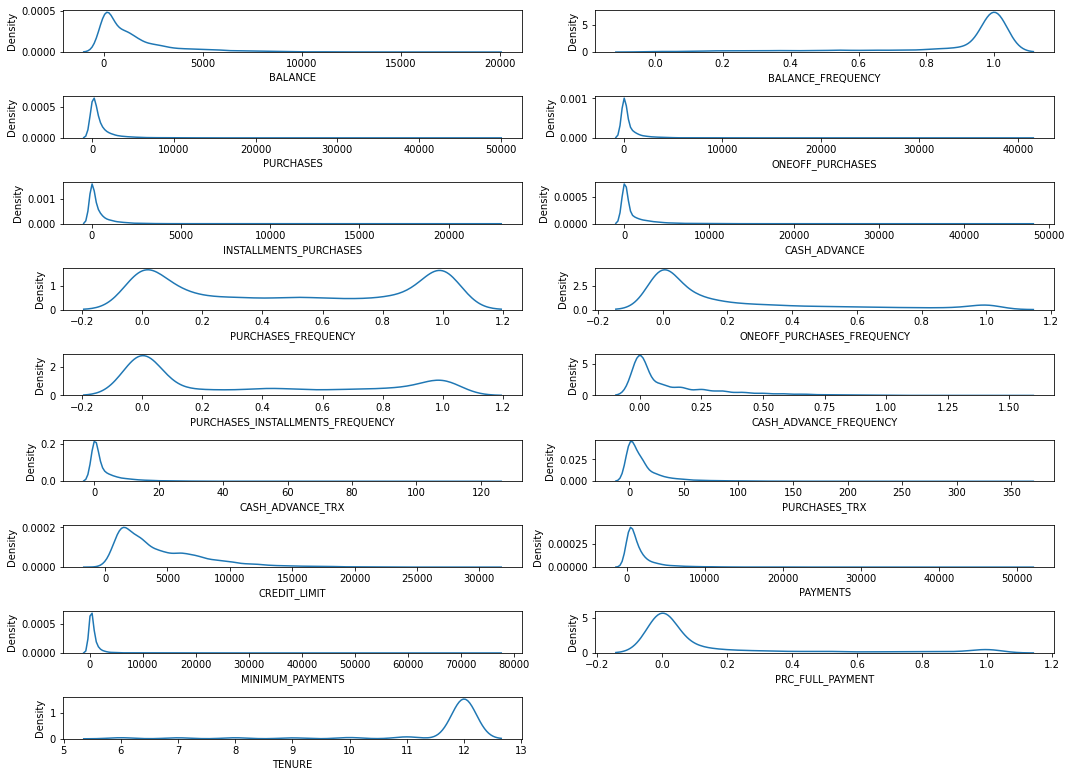

In [9]:
fig = plt.figure(figsize=(15,20))
for i, col in enumerate(df.columns):
    axis = plt.subplot(len(df.columns), 2, i+1)
    sns.kdeplot(df[col], ax=axis)
plt.tight_layout()

    Transforming skewed features

In [10]:
skewed_cols = df.columns[~df.columns.isin(
    ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'TENURE'])].tolist()


In [11]:
for col in skewed_cols:
    df[col] = np.log(1 + df[col]) # +1 to offset 0 values

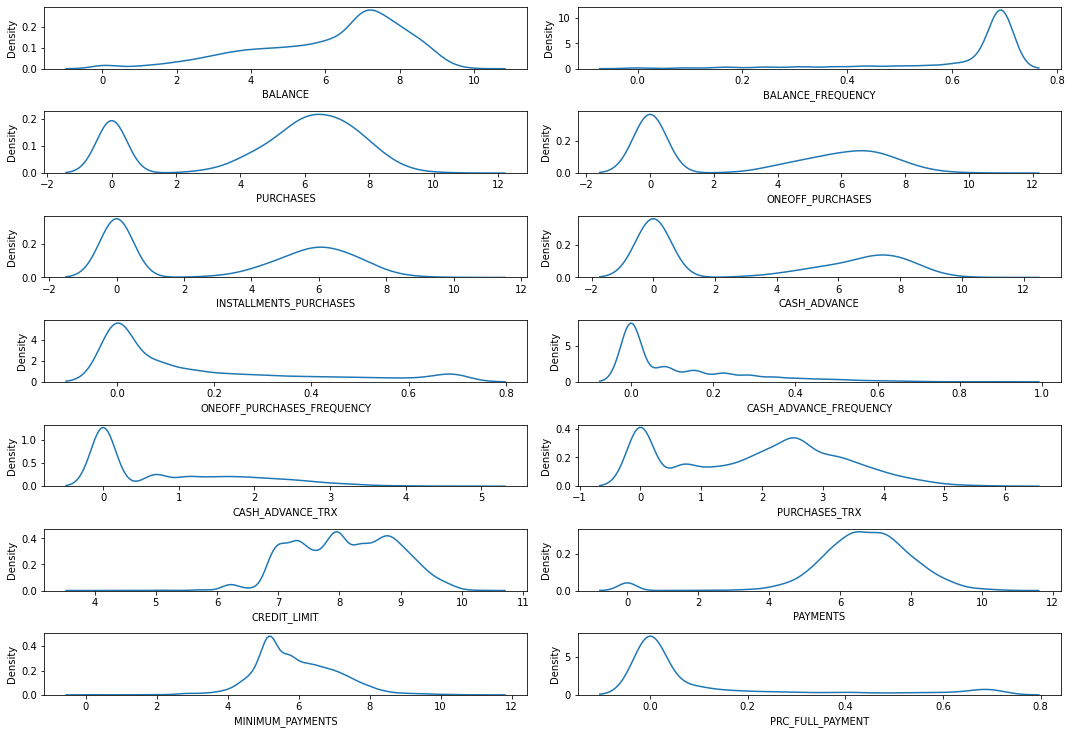

In [12]:
fig = plt.figure(figsize=(15,20))
for i, col in enumerate(skewed_cols):
    axis = plt.subplot(len(skewed_cols), 2, i+1)
    sns.kdeplot(df[col], ax=axis)
plt.tight_layout()

    We have fixed the extreme skew, We will not be addressing outliers because we are only concerned about clustering of the features. Furthermore we will apply a normalization to our features because clustering algorithms that use distance are sensitive to range of the distribution.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(
    df), columns=df.columns, index=df.index)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-1.205218,-0.148757,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.732480,-0.707313,-0.724360,-0.810069,-0.579510,-1.447163,-0.824484,-0.829841,-0.556368,0.36068
C10002,0.948918,0.179616,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.732480,-0.916995,0.699592,0.784603,-1.379210,0.926060,1.065033,0.908184,0.391958,0.36068
C10003,0.824993,0.492710,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.466762,-0.916995,-0.724360,-0.810069,0.487865,1.010229,-0.119300,0.450407,-0.556368,0.36068
C10004,0.624653,-0.857867,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.363042,-0.916995,-0.213583,-0.123281,-0.874655,1.010229,-4.161996,-0.144271,-0.556368,0.36068
C10005,0.271260,0.492710,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.363042,-0.916995,-0.724360,-0.810069,-0.874655,-1.224909,-0.064979,-0.351833,-0.556368,0.36068


    Creating a corelation matrix

<AxesSubplot:>

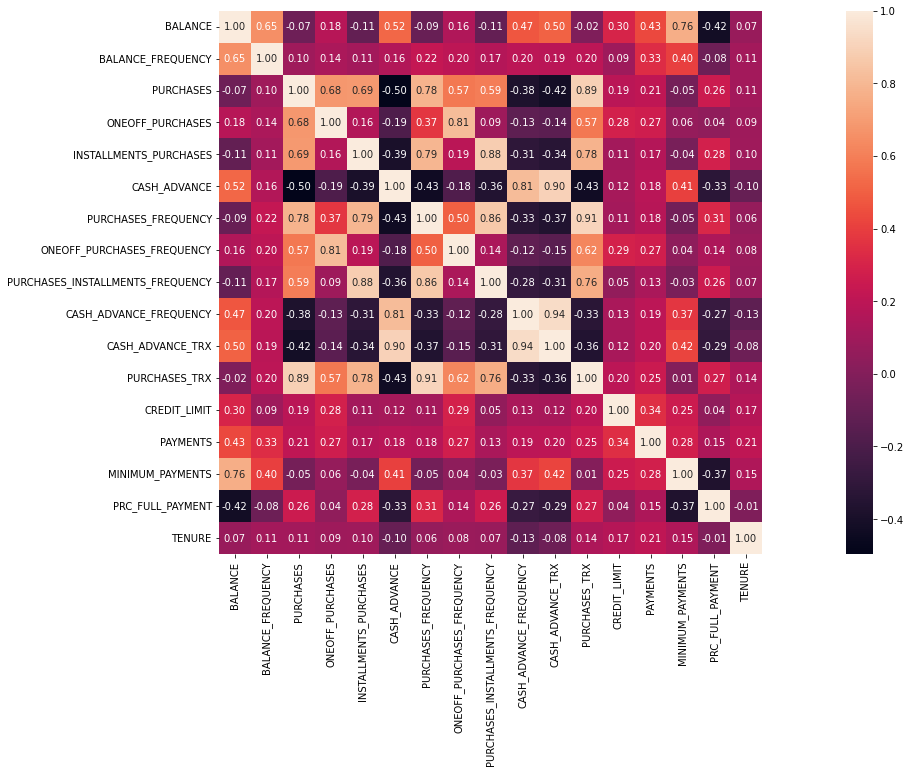

In [15]:
plt.figure(figsize=(30,10))
sns.heatmap(data=df_scaled.corr(), square=True, annot=True, fmt='.2f')

In [16]:
corelation_above = 0.7

c = df_scaled.corr().unstack().to_frame(
).reset_index().drop_duplicates(subset=[0],keep='first')
c[(c['level_0'] != c['level_1']) & (c[0] > corelation_above)]\
    .rename(columns=dict(zip(c.columns.to_list(), ['feature1', 'feature2', 'corelation'])))\
    .sort_values('corelation', ascending=0).reset_index(drop=True)


,feature1,feature2,corelation
0,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,0.936469
1,PURCHASES_FREQUENCY,PURCHASES_TRX,0.909024
2,CASH_ADVANCE,CASH_ADVANCE_TRX,0.898398
3,PURCHASES,PURCHASES_TRX,0.888988
4,INSTALLMENTS_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,0.878672
5,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,0.862934
6,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,0.814491
7,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,0.813939
8,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,0.794784
9,INSTALLMENTS_PURCHASES,PURCHASES_TRX,0.782683


In [17]:
KPI = [["PURCHASES_FREQUENCY", "CASH_ADVANCE"],
       ["ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY"],
       ["PURCHASES_TRX", "CASH_ADVANCE_TRX"],
       ["BALANCE", "CREDIT_LIMIT"],
       ["PAYMENTS", "MINIMUM_PAYMENTS"],
       ["BALANCE_FREQUENCY", "PRC_FULL_PAYMENT"],
       ["TENURE", "BALANCE_FREQUENCY"],
       ["TENURE", "PURCHASES"], ]


def plot_kpi_with_cluster(df_, cluster_label,):
    fig = plt.figure(figsize=(20, 40))
    for i, cols in enumerate(KPI):
        axis = plt.subplot(len(KPI), 2, i+1)
        n_df = df_[cols].copy(deep=True)
        n_df['cluster'] = cluster_label
        sns.scatterplot(data=n_df, x=cols[0], y=cols[1], hue='cluster', palette=sns.color_palette(
            "hls", n_df['cluster'].nunique()))
    plt.tight_layout()


    K-Means Clustering

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


<AxesSubplot:>

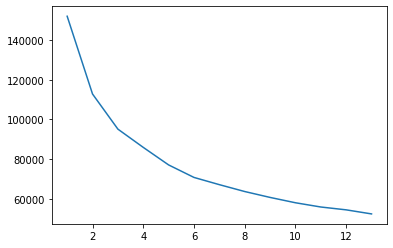

In [19]:
inertia = []
scores = []

for i in range(1, 14):
    cluster_model = KMeans(i)
    cluster_label = cluster_model.fit_predict(df_scaled.to_numpy())
    inertia.append(cluster_model.inertia_)
    if i > 1:
        score = silhouette_score(df_scaled, cluster_label, metric='euclidean')
        scores.append(score)

sns.lineplot(y=inertia, x=range(1, len(inertia)+1))


<AxesSubplot:>

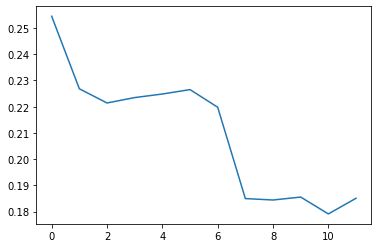

In [20]:
sns.lineplot(data=scores)

Knee:  5


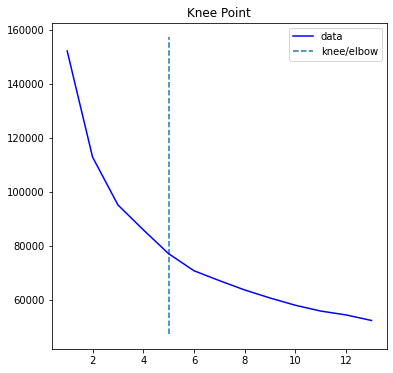

In [21]:
import kneed
kneedle = kneed.KneeLocator(
    list(range(1, len(inertia)+1)), inertia, curve="convex", direction="decreasing")
knee_point = kneedle.knee
print('Knee: ', knee_point)
kneedle.plot_knee()


In [22]:
k_means_model = KMeans(knee_point, random_state=1)
cluster_label = k_means_model.fit_predict(df_scaled.to_numpy())
silhouette_score(df_scaled, cluster_label, metric='euclidean')


0.2236147925399377

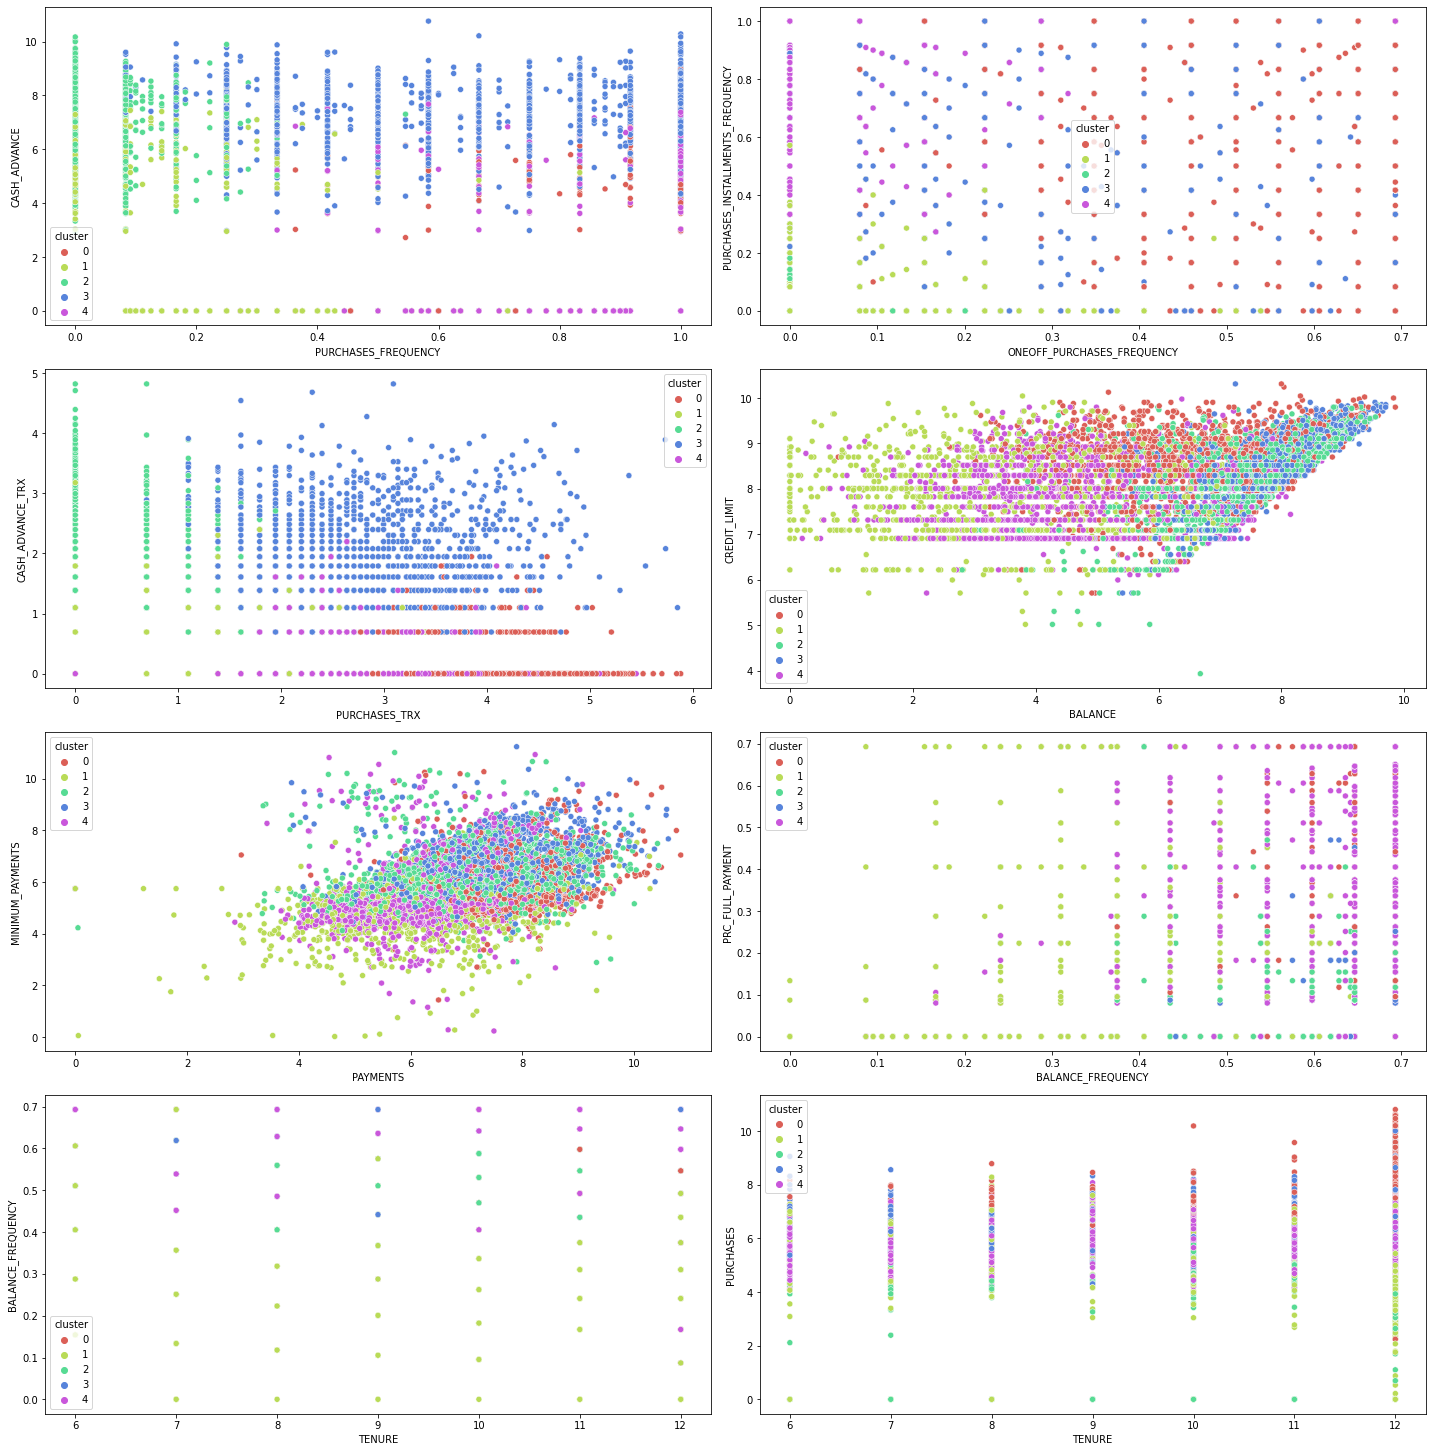

In [23]:
original_df = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
plot_kpi_with_cluster(original_df, cluster_label)


    Doing PCA before clustering for feature reduction

In [24]:
from sklearn.decomposition import PCA


Knee:  5


<AxesSubplot:>

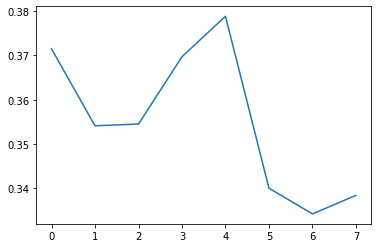

In [25]:
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

inertia = []
scores = []
for i in range(1, 10):
    cluster_model = KMeans(i)
    cluster_label = cluster_model.fit_predict(df_pca.to_numpy())
    inertia.append(cluster_model.inertia_)
    if i > 1:
        score = silhouette_score(df_pca, cluster_label, metric='euclidean')
        scores.append(score)


print('Knee: ', knee_point)

sns.lineplot(data=scores)


In [26]:

k_means_model = KMeans(knee_point, random_state=1)
cluster_label = k_means_model.fit_predict(df_pca.to_numpy())

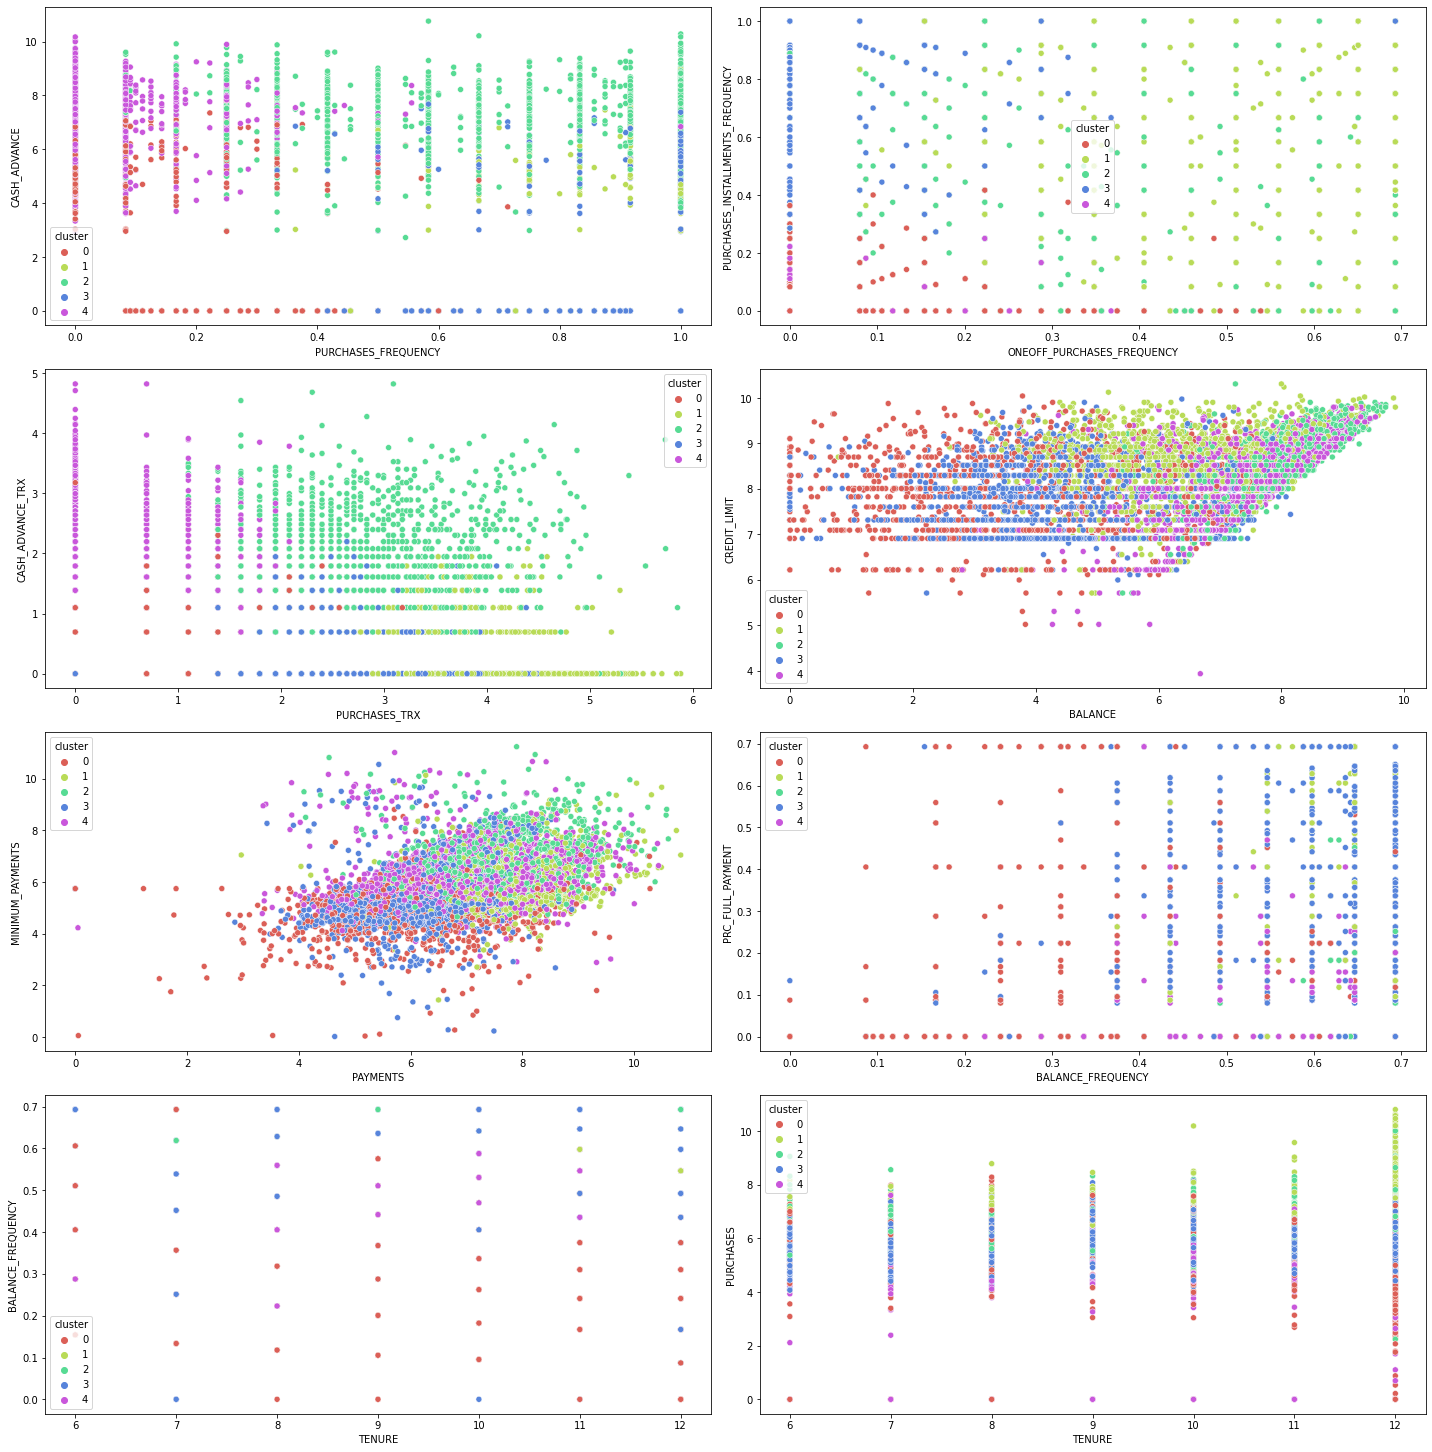

In [27]:
original_df = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
plot_kpi_with_cluster(original_df, cluster_label)


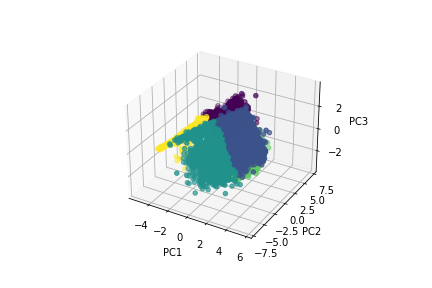

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.440000057220459, 'type': 'set_device_pixel_ratio'}


In [28]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x,y,z = [df_pca[col] for col in df_pca.columns.to_list()]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(x, y, z, c=cluster_label)

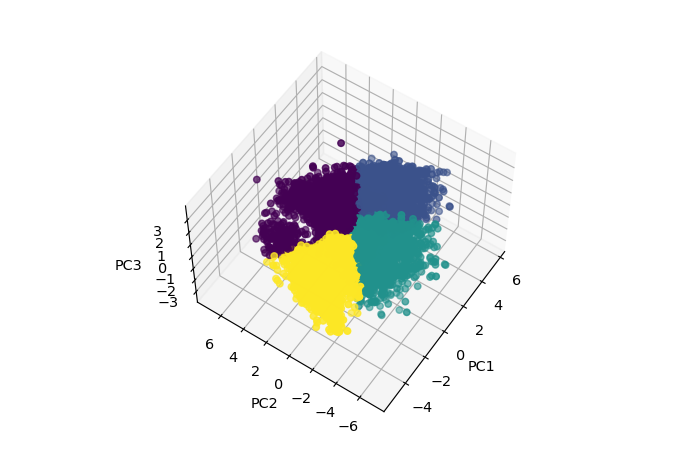

In [30]:
from PIL import Image

im = Image.open('./resources/Figure 1.png')
 
display(im)

In [96]:
%matplotlib inline

In [104]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X, y = df_scaled.drop('PURCHASES', axis=1),df_scaled['PURCHASES'] 
# define feature selection
fs = SelectKBest(score_func=f_classif, k=5)
# apply feature selection
fs.fit_transform(X, y)
top_5_features = fs.get_feature_names_out().tolist()

<Figure size 1800x1800 with 0 Axes>

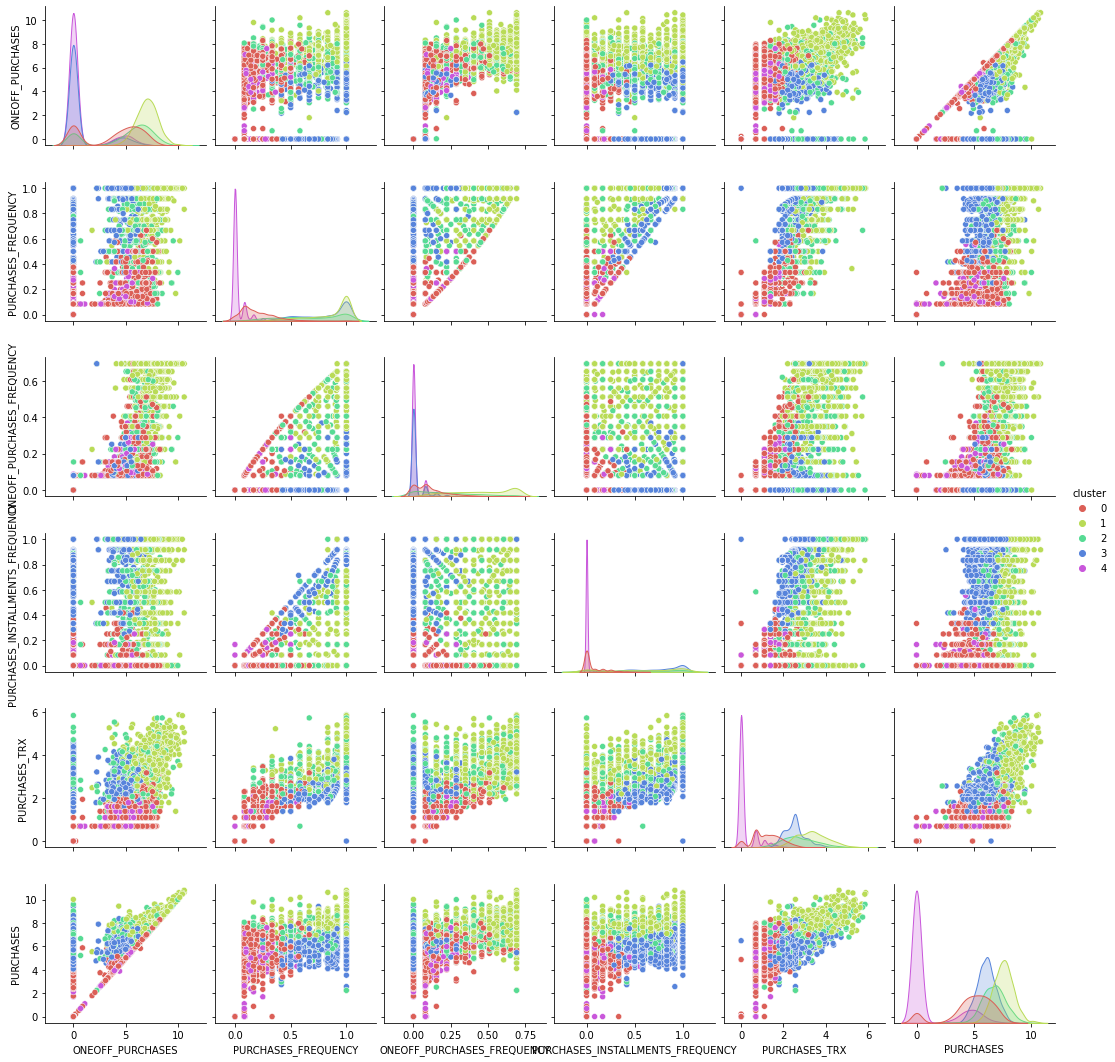

In [108]:
n_df = df[[*top_5_features,'PURCHASES']].copy(deep=True)
n_df['cluster'] = cluster_label
plt.figure(figsize=(25,25))
sns.pairplot( n_df, hue="cluster", palette=sns.color_palette(
            "hls", n_df['cluster'].nunique()))

    Observations

In [109]:
sns.color_palette("hls", 5)

[(0.86, 0.3712, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86)]

-   Cluster 0: Low Spending and Low Activity . These are low value customers

-   Cluster 1: Highest Spending and Maximum Activity . These are highest value customers

-   Cluster 2: Medium Spending and Medium Activity and High Advance Cash Purchases . These are average value customers

-   Cluster 3: Medium Spending and Medium Activity and High Installment Purchases . These customers incur highest average credit interest

-   Cluster 4: Least Activity and with Comparatively Higher One off purchases . These cannot be considered as regular customers since the use their card very rarely